In [9]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Generate some test data
x = np.random.randn(8873)
y = np.random.randn(8873)

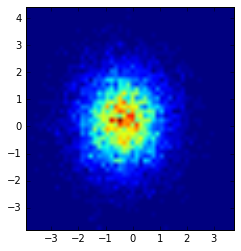

In [23]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap, extent=extent)
plt.show()

In [31]:
from mpl_toolkits.basemap import Basemap
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from netCDF4 import Dataset, num2date, date2num
from numpy import *
from matplotlib.colors import LinearSegmentedColormap

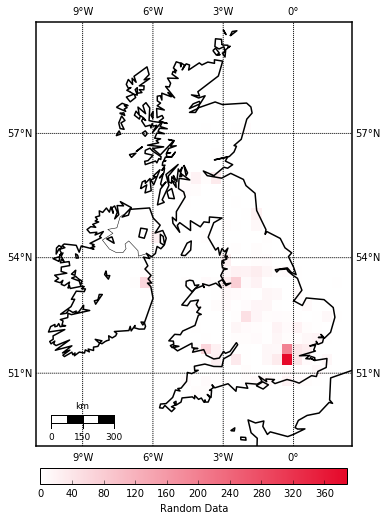

In [140]:

# create basemap
my_map = Basemap (projection='merc', lat_0=51.45, lon_0 = -2.583333, resolution = 'l', 
                  area_thresh = 50.0, llcrnrlon=-11, llcrnrlat=49, urcrnrlon=2.5, urcrnrlat =59.5)

my_map.drawcoastlines(linewidth=1.5)
my_map.drawcountries()
#my_map.fillcontinents(color='green')
my_map.drawmapboundary(linewidth=1.5)
my_map.drawmeridians(arange(-15,5,3),labels=[1,1,1,1])
my_map.drawparallels(arange(45,60,3),labels=[1,1,1,1])

# load tweet data
data = numpy.loadtxt('coords.txt', delimiter = ' ')
x = data[:,0]
y = data[:,1]

# compute appropriate bins to chop up the data:
db = 1 # bin padding
lon_bins = np.linspace(min(x)-db, max(x)+db, 25+1) # 50 bins
lat_bins = np.linspace(min(y)-db, max(y)+db, 35+1) # 70 bins
    
density, _, _ = np.histogram2d(y, x, [lat_bins, lon_bins])

# Turn the lon/lat of the bins into 2 dimensional arrays ready
# for conversion into projected coordinates
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = my_map(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh

# define custom colormap, white -> nicered, #E6072A = RGB(0.9,0.03,0.16)
cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }
custom_map = LinearSegmentedColormap('custom_map', cdict)
plt.register_cmap(cmap=custom_map)

# add histogram squares and a corresponding colorbar to the map:
plt.pcolormesh(xs, ys, density, cmap="custom_map")

cbar = plt.colorbar(orientation='horizontal', shrink=0.55, aspect=20, fraction=0.2, pad=0.04)
cbar.set_label('Random Data',size=10)

# add map scale
my_map.drawmapscale(-9,49.75,-9,49.75,300,barstyle='fancy')

# inrease size of plot
plt.gcf().set_size_inches(10,10)


plt.show()

In [95]:
from scipy import stats

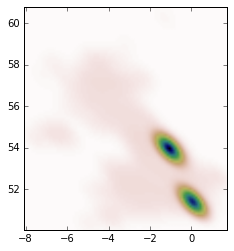

In [105]:
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
#ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()